In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
import os
os.getcwd()

'/Users/richapandey/Abhishek/projects/ebay-product-knowledge-graph'

In [3]:
input_csv = "/Users/richapandey/Abhishek/projects/ebay-product-knowledge-graph/data/processed/normalized_entities.csv"

In [4]:
df = pd.read_csv(input_csv)
df

,id,title,normalized_entities
0,1,Apple iPhone 13 Pro Max,"['Iphone 13', '256', '13', 'Apple']"
1,2,Samsung Galaxy S21 Ultra,"['Samsung Galaxy S21 Ultra', 'phantom black', ..."
2,3,Nike Air Zoom Pegasus 39,"['Nike Air Zoom Pegasus', '39', '10']"
3,4,Sony WH-1000XM5 Headphones,"['Wireless', 'Sony']"
4,5,Dell XPS 13 Laptop,"['Dell Xps 13', '512', 'Intel', '16', 'Dell Xp..."


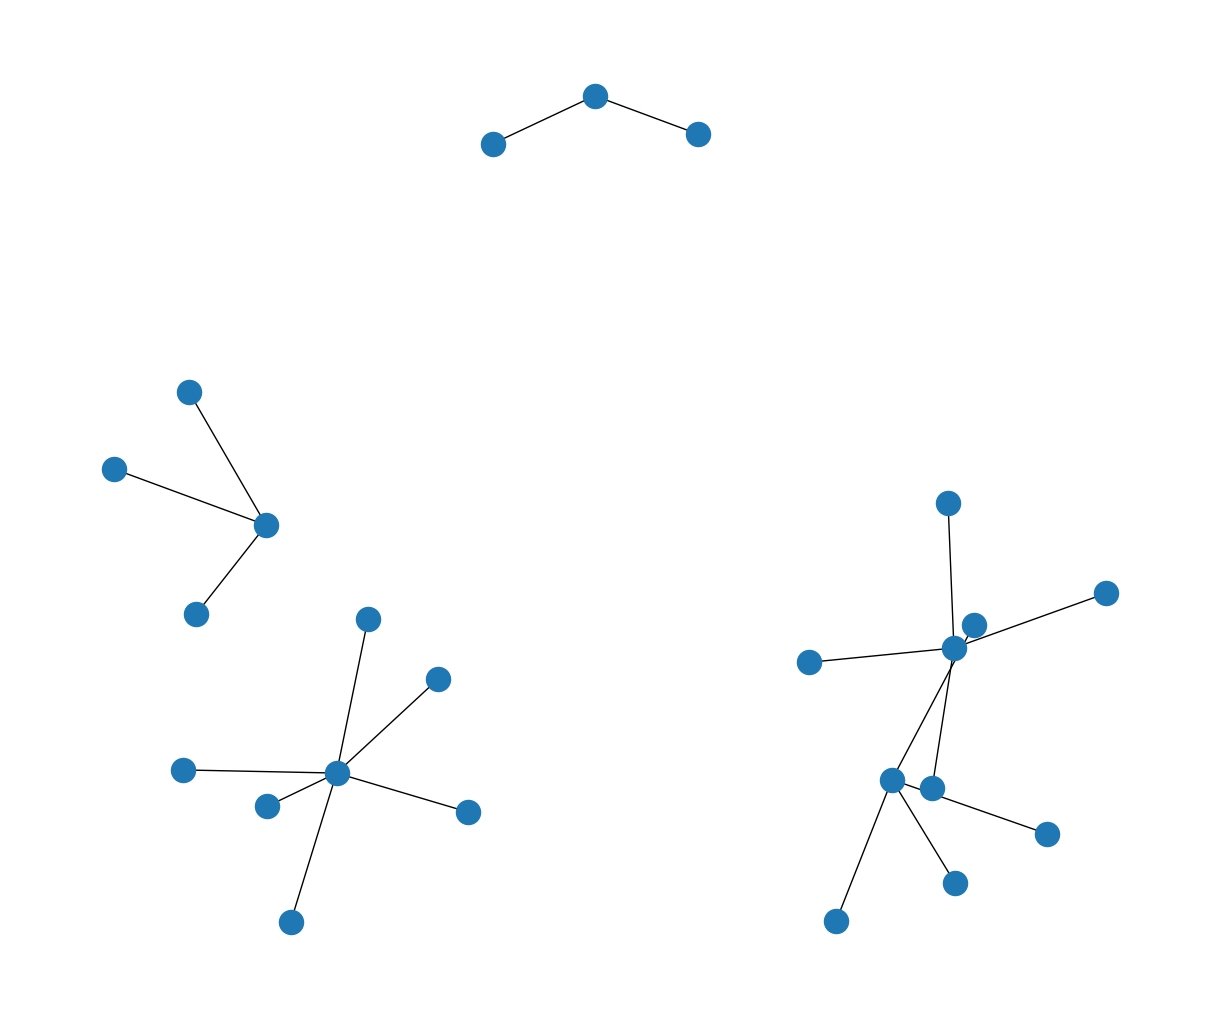

In [10]:
G = nx.Graph()

for _, row in df.iterrows():
    product_id = f"product_{row['id']}"
    G.add_node(product_id, type="product", title=row["title"])

    entities = eval(row["normalized_entities"])
    for entity in entities:
        entity_node = f"entity_{entity.lower()}"
        G.add_node(entity_node, type="entity", label=entity)
        G.add_edge(product_id, entity_node)

plt.figure(figsize=(12,10))

node_colors = []
labels = {}

for node in G.nodes(data=True):
    if node[1]['type'] == 'product':
        node_colors.append('lightblue')
        labels[node[0]] = node[1].get('title','')
    else:
        node_colors.append('orange')
        labels[node[0]] = node[1].get('label','')

pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos)
# nx.draw(G, pos, with_labels=True, labels = labels, node_color=node_colors, node_size=700, font_size=7)
plt.show()

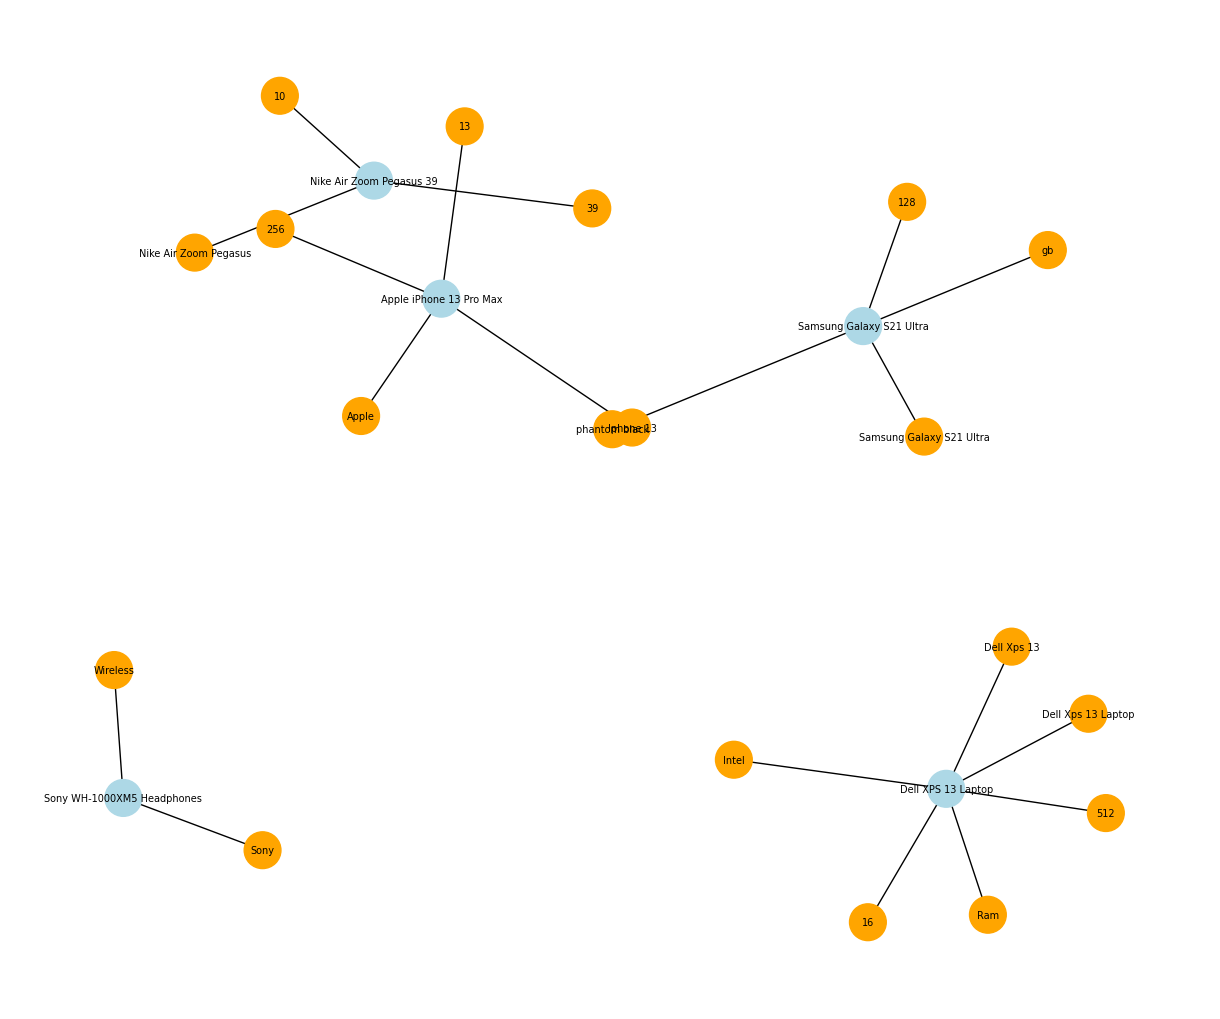

In [11]:
G = nx.Graph()

for _, row in df.iterrows():
    product_id = f"product_{row['id']}"
    G.add_node(product_id, type="product", title=row["title"])

    entities = eval(row["normalized_entities"])
    for entity in entities:
        entity_node = f"entity_{entity.lower()}"
        G.add_node(entity_node, type="entity", label=entity)
        G.add_edge(product_id, entity_node)

plt.figure(figsize=(12,10))

node_colors = []
labels = {}

for node in G.nodes(data=True):
    if node[1]['type'] == 'product':
        node_colors.append('lightblue')
        labels[node[0]] = node[1].get('title','')
    else:
        node_colors.append('orange')
        labels[node[0]] = node[1].get('label','')

pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, labels = labels, node_color=node_colors, node_size=700, font_size=7)
plt.show()

In [14]:
nx.write_gml(G, "/Users/richapandey/Abhishek/projects/ebay-product-knowledge-graph/outputs/graphs/product_knowledge_graph.gml")

In [ ]:
def build_knowledge_graph(input_csv):
    df = pd.read_csv(input_csv)
    G = nx.Graph()

    for _, row in df.iterrows():
        product_id = f"product_{row['id']}"
        G.add_node(product_id, type="product", title=row["title"])

        # Safely evaluate stringified list
        entities = eval(row["normalized_entities"])
        for entity in entities:
            entity_node = f"entity_{entity.lower()}"
            G.add_node(entity_node, type="entity", label=entity)
            G.add_edge(product_id, entity_node)

    return G

In [ ]:
def draw_graph(G, limit=50):
    plt.figure(figsize=(12, 10))

    node_colors = []
    labels = {}

    for node in G.nodes(data=True):
        if node[1]['type'] == 'product':
            node_colors.append('lightblue')
            labels[node[0]] = node[1].get('title', '')
        else:
            node_colors.append('orange')
            labels[node[0]] = node[1].get('label', '')

    pos = nx.spring_layout(G, k=0.5, iterations=50)
    nx.draw(G, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=700, font_size=7)
    plt.title("Product Knowledge Graph")
    plt.show()

In [ ]:
if __name__ == "__main__":
    graph = build_knowledge_graph("data/processed/normalized_entities.csv")
    draw_graph(graph)